<h3 style="color:red;text-align:center;">Python pour le programme de Terminale
</h3>
<p><br></p>
<div style="text-align:justify;">

<ol>
    <li style="padding-bottom:1em;"><a href="./pythonterm.ipynb" > La bibliothèque random </a></li>
    <li style="padding-bottom:1em;"><a href="./pythonterm2.ipynb" > Simuler un processus aléatoire illustrant la détermination de la valeur d’une grandeur avec incertitudes types composées </a></li>
    <li style="padding-bottom:1em;"><a href="./pythonterm3.ipynb" > Représenter, à l’aide d’un langage de programmation, l’évolution des quantités de matière des espèces en fonction du volume de solution titrante versé </a></li>
    <li style="padding-bottom:1em;"><a href="./pythonterm4.ipynb" > Déterminer, à l’aide d’un langage de programmation, le taux d’avancement final d’une transformation, modélisée par la réaction d’un acide sur l’eau </a></li>
    <li style="padding-bottom:1em;"><a href="./pythonterm5.ipynb" > Tracer, à l’aide d’un langage de programmation, le diagramme de distribution des espèces d’un couple acide-base de pKa donné </a></li>
    <li style="padding-bottom:1em;"><a href="./pythonterm6.ipynb" > À l’aide d’un langage de programmation et à partir de données expérimentales, tracer l’évolution temporelle d’une concentration, d’une vitesse volumique d’apparition ou de disparition et tester une relation donnée entre la vitesse volumique de disparition et la concentration d’un réactif </a></li>
    <li style="padding-bottom:1em;"><a href="./pythonterm7.ipynb" > Exploiter, à l’aide d’un langage de programmation, des données astronomiques ou satellitaires pour tester les deuxième et troisième lois de Kepler </a></li>
</ol></div>

<h1 style="text-align:center;">1. La bibliothèque random </h1>

La bibliothèque random en python permet de mélanger une liste ou de tirer une valeur aléatoire par exemple.

In [1]:
# Import de la bibliothèque
import random as rd
import matplotlib.pyplot as plt

* Exemple de mélange d'une liste

In [2]:
l = list(range(10))
print("la liste initiale est",l)
rd.shuffle(l)
print("la liste melangée est",l)

la liste initiale est [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
la liste melangée est [9, 3, 4, 5, 0, 2, 7, 1, 6, 8]


* Exemple de tirage aléatoire de valeur

1. Tirer une valeur aléatoire dans un ensemble choisi avec équiprobabilité entre les valeurs

On utilise pour celà **rd.random()**

In [3]:
# rd.random() tire une valeur aléatoire dans [0, 1[
a = -2 + 4*rd.random()
print("la valeur obtenue est",a)

la valeur obtenue est -0.21539380471457248


Comme rd.random() tire une valeur aléatoire dans [0, 1[, la cellule ci-dessus donnera une valeur différente à chaque exécution dans l'ensemble [-2, 2[ car la valeur va de $-2\ +\ 4 \times 0 = -2$ inclu à $-2\ +\ 4 \times 1 = 2$ exclu.

2. Tirer aléatoirement un élément d'une liste.


On utilise pour celà **rd.choice(liste)**

In [4]:
l = [2, 3, 5, 7, 11, 13, 17, 19, 23, 29]
element = rd.choice(l)
print(element)

11


La cellule ci-dessus affichera à chaque exécution une valeur tirée aléatoirement dans la liste l.

3. Tirer une valeur pour simuler un phénomène naturel aléatoire dont on connaît moyenne et écart type


On utilise pour celà **rd.normalvariate(moyenne, ecart_type)**

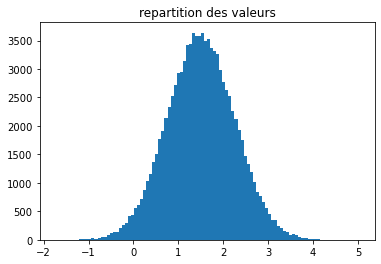

In [5]:
moyenne = 1.5
sigma = 0.75
x = []
for i in range(100000): # 100000 tirages
    x.append(rd.normalvariate(moyenne,sigma))
plt.hist(x,bins=100) # pour le tracé d'histogramme voir la partie concernée
plt.title("repartition des valeurs")
plt.show()

In [6]:
# Calcul de moyenne
print("moyenne donnée: ", moyenne)
print("moyenne tirage: ", sum(x)/len(x))

moyenne donnée:  1.5
moyenne tirage:  1.5027417927420041


L'écart type $\sigma_{n - 1}$ se calcule d'après: 

$$\sigma_{n-1} = \sqrt{\frac{1}{n-1}\sum_{i = 1}^{n}{\left(X_i - \bar{X}\right)}^2} = \sqrt{\frac{1}{n-1}\sum_{i = 1}^{n}{{X_i}^2} - \bar{X}^2}$$


C'est la deuxième forme que l'on utilise ci-dessous pour le calculer.


In [7]:
# Calcul écart type
print("ecart type donné: ", sigma)

somme = 0
for element in x:
    somme += element**2
sigma_n_moins_un = (1/(len(x)-1) * somme - (sum(x)/len(x))**2)**0.5

print("ecart type tirage: ",sigma_n_moins_un)

ecart type donné:  0.75
ecart type tirage:  0.749064665872718


Une valeur est considérée comme correcte lorsqu'elle se situe dans l'intervalle $\left[\bar{X} - 2\sigma , \bar{X} + 2\sigma \right]$ qui correspond à 95% des tirages aléatoires dans le cas d'une loi normale. Si on veut un intervalle de confiance à 99%, il faut prendre l'intervalle $\left[\bar{X} - 3\sigma , \bar{X} + 3\sigma \right]$

In [8]:
# Mesure du pourcentage de valeurs à 
# moyenne +- sigma
# moyenne +- 2 sigma
# moyenne +- 3 sigma
unsigma = 0
deuxsigma = 0
troissigma = 0
for el in x:
    if moyenne - sigma < el < moyenne + sigma:
        unsigma += 1
    if moyenne - 2*sigma < el < moyenne + 2*sigma:
        deuxsigma += 1
    if moyenne - 3*sigma < el < moyenne + 3*sigma:
        troissigma += 1

print("à +- 1 sigma",100*unsigma/len(x),"%")
print("à +- 2 sigma",100*deuxsigma/len(x),"%")
print("à +- 3 sigma",100*troissigma/len(x),"%")

à +- 1 sigma 68.374 %
à +- 2 sigma 95.438 %
à +- 3 sigma 99.734 %


Le z-score représente le rapport entre l'écart (en valeur absolue) entre la valeur obtenue et la moyenne des valeurs et l'écart type. Si ce z-score est inférieur à 2, on considère que la valeur est de bonne qualité (on est à $\pm\ 2 \sigma$ de la moyenne). Dans certains cas on pourra être amenés à comparer le zscore à 1 ou à 3.

In [9]:
def zscore(valeur,moyenne,sigma):
    return abs(valeur - moyenne)/sigma

# Par exemple
print("valeur: ",0.28, "zscore: ",zscore(0.28,moyenne,sigma))
# On a bien 1.5 - 2*0.75 < 0.28 < 1.5 + 2*0.75 d'où un zscore < 2

print("valeur: ", 3.6, "zscore: ",zscore(3.6,moyenne,sigma))
# On a 1.5 + 2*0.75 < 3.6 donc zscore > 2


valeur:  0.28 zscore:  1.6266666666666667
valeur:  3.6 zscore:  2.8000000000000003


# Exercice 
Un constructeur de composants électroniques indique que:
Une résistance est construite avec une valeur de $R = 1000\ \Omega$ et une tolérance de 5%. On assimilera cette tolérance et l'écart type.
1. Ecrire une fonction alea(R,sigma) qui prend comme arguments la valeur de R et la tolérance données et qui renvoie une valeur de résistance correspondant au choix aléatoire d'une résistance parmi un grand nombre de composants.
2. Construire une liste de 8 valeurs (obtenues à l'aide de la fonction alea) afin de simuler les valeurs de R distribuées à chaque binôme lors d'un TP.
3. Ecrire une fonction **moyenne(liste)** et une fonction **sigma(liste)** qui renvoient respectivement la moyenne et $\sigma_{n-1}$ pour la série de valeurs contenue dans la liste. Utiliser alors ces fonctions afin de calculer moyenne et $\sigma_{n-1}$ pour la série de valeurs de la question 2.
4. Construire la liste des z-score pour chaque valeur de cette série.

In [11]:
# 1.
def alea(R, sigma):
    # A compléter
    
    
# test de la fonction
R = 1000
sigma = 50
alea(R, sigma)

In [12]:
# 2.


In [14]:
# 3.
def moyenne(liste):
    # à compléter
    
def sigma(liste):
    # à compléter
    
    

In [15]:
# 4.


<div align="right"><a href="./pythonterm2.ipynb"> page suivante </a></div>